___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers



plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [4]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [5]:
X_train[1].shape

(28, 28)

In [6]:
X_train[5].min()

0

In [7]:
X_train[5].max()

255

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [8]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

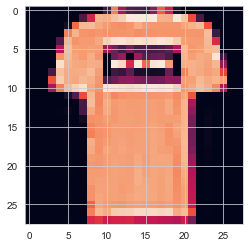

In [9]:
plt.imshow(X_train[1])
plt.show()


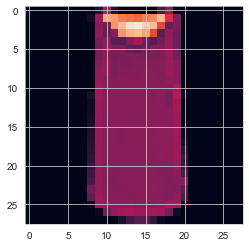

In [10]:
plt.imshow(X_train[2])
plt.show()

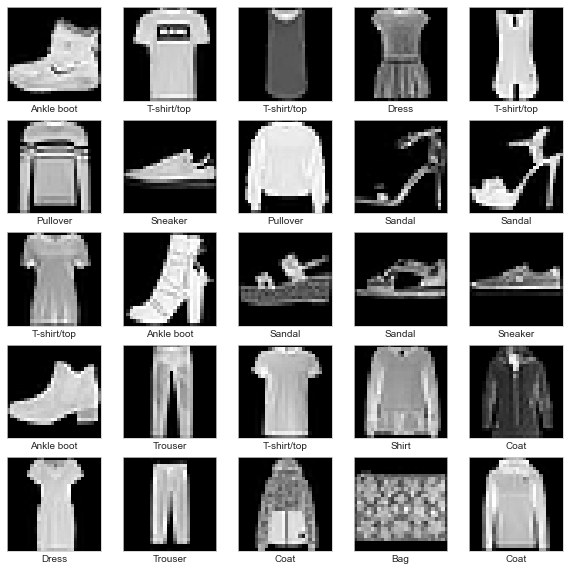

In [11]:
plt.figure(figsize=(10, 10))

# Display a grid of 25 images
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    label = classes[y_train[i]]
    plt.xlabel(label)

plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [12]:
# Normlizing X_train and X_test by dividing by 255, values will be between 0 and 1
# X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [13]:
X_train.max()

1.0

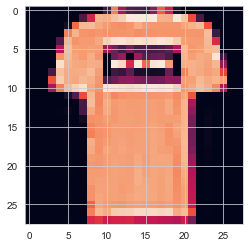

In [14]:
plt.imshow(X_train[1])
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [15]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [16]:
X_train[1].shape

(28, 28, 1)

In [17]:
#X_train = np.expand_dims(X_train, 4) # 4 is the number of dimensions that we want
#X_test = np.expand_dims(X_test, 4)

In [18]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [19]:
num_classes = 10  # Number of classes (for Fashion MNIST)

y_train_onehot = to_categorical(y_train, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

In [20]:
y_train_onehot.shape

(60000, 10)

In [21]:
y_test_onehot.shape

(10000, 10)

In [22]:
y_train[5]

2

In [23]:
y_train_onehot[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [24]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))  # padding = valid, pooling_size= (2,2), by default if we not specify the stride it will be the same size of pooling, so we had to specify strides=(1,1)

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
______________________________________________

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [26]:
early_stop= EarlyStopping(monitor='val_accuracy',
                          patience=5,
                          mode='max',
                          restore_best_weights=True) # We are using accuracy as metric for this model, and we are aiming to maximize accuracy

In [27]:
model.fit(X_train, y_train_onehot, epochs=20, validation_data=(X_test, y_test_onehot), batch_size= 32, callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 79s 41ms/step - loss: 0.3672 - accuracy: 0.8705 - val_loss: 0.3089 - val_accuracy: 0.8891
Epoch 2/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2490 - accuracy: 0.9130 - val_loss: 0.2761 - val_accuracy: 0.9025
Epoch 3/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2107 - accuracy: 0.9262 - val_loss: 0.3095 - val_accuracy: 0.8911
Epoch 4/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1861 - accuracy: 0.9348 - val_loss: 0.3239 - val_accuracy: 0.8949
Epoch 5/20
1875/1875 [==============================] - 76s 40ms/step - loss: 0.1658 - accuracy: 0.9414 - val_loss: 0.2897 - val_accuracy: 0.9071
Epoch 6/20
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1526 - accuracy: 0.9465 - val_loss: 0.3122 - val_accuracy: 0.9096
Epoch 7/20
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1416 - accuracy: 0.9511 - val_loss: 0.3017 -

**TASK 7: Plot values of metrics you used in your model.**

In [28]:
model.metrics_names

['loss', 'accuracy']

In [29]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.367,0.871,0.309,0.889
1,0.249,0.913,0.276,0.902
2,0.211,0.926,0.309,0.891
3,0.186,0.935,0.324,0.895
4,0.166,0.941,0.290,0.907


<Axes: >

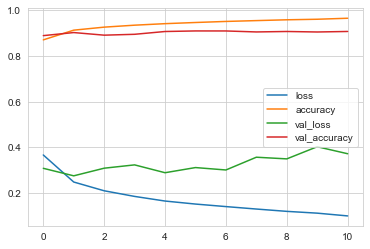

In [30]:
summary.plot()

Looking at the graph, we notice that the val score is low and decreasing, which means our model is doing good on the training dataset. But when looking at the val_loss score which represents the how well the model is performing on data it has not seen during training the validation data, we see it is increasing. This indicates there is an overfitting situation.

The accuracy and val_accuracy have close scores.

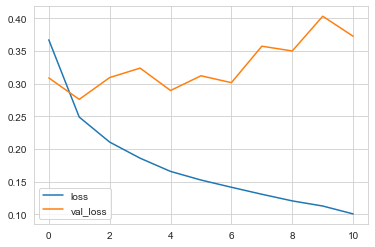

In [31]:
summary[["loss", "val_loss"]].plot();

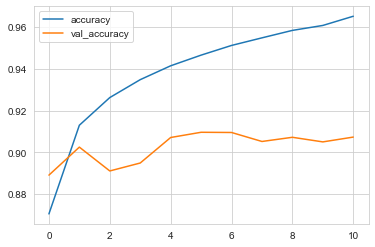

In [32]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [33]:
# From the MINST notebooke
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [34]:
model.evaluate(X_test, y_test_onehot)

313/313 [==============================] - 2s 7ms/step - loss: 0.3122 - accuracy: 0.9096


[0.31219926476478577, 0.909600019454956]

In [35]:
score = model.evaluate(X_test, y_test_onehot, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.31219926476478577
Test accuracy: 0.909600019454956


Loss is 0.3121 which indicates that the model's predictions are close to the true labels on average. Accuracy score is 91, which is very good, means that the model correctly classified about 90% of the test samples.

In [36]:
predicted_probabilities = model.predict(X_test)
predicted_probabilities

313/313 [==============================] - 2s 6ms/step


array([[3.46284423e-09, 9.79059126e-16, 2.82572354e-10, ...,
        8.63418245e-06, 8.44652259e-09, 9.99989331e-01],
       [1.04392779e-10, 1.94467718e-23, 9.99999940e-01, ...,
        6.05589052e-14, 1.65006762e-15, 3.46589793e-18],
       [6.78022308e-13, 9.99999940e-01, 7.67542214e-18, ...,
        6.40105776e-17, 1.43016919e-13, 4.03367719e-18],
       ...,
       [2.69271503e-13, 9.13145694e-26, 7.63503918e-17, ...,
        9.24552344e-16, 9.99999940e-01, 1.53696238e-18],
       [8.33704037e-15, 9.99999940e-01, 3.91775734e-17, ...,
        2.17205089e-17, 1.09103535e-16, 7.09395980e-15],
       [5.43131027e-04, 4.15346591e-07, 4.37582028e-04, ...,
        3.05540133e-02, 7.47038168e-04, 1.29220786e-03]], dtype=float32)

In [37]:
# determinig predicted class labels
y_pred = np.argmax(predicted_probabilities, axis=1)


confusion_mtx = confusion_matrix(np.argmax(y_test_onehot, axis=1), y_pred)

report = classification_report(np.argmax(y_test_onehot, axis=1), y_pred)

print("Confusion Matrix:")
print(confusion_mtx)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[835   0   8   7   7   2 135   0   6   0]
 [  3 975   0  12   3   0   6   0   1   0]
 [ 16   0 831   6  78   2  66   0   1   0]
 [ 18   5   7 879  49   0  40   0   2   0]
 [  1   0  34   9 917   1  37   0   1   0]
 [  0   0   0   0   0 987   0   2   0  11]
 [ 73   0  45  17  86   0 772   0   7   0]
 [  0   0   0   0   0  17   0 953   0  30]
 [  1   1   1   1   2   3   7   4 980   0]
 [  1   0   0   0   0   7   0  25   0 967]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.90      0.83      0.86      1000
           3       0.94      0.88      0.91      1000
           4       0.80      0.92      0.86      1000
           5       0.97      0.99      0.98      1000
           6       0.73      0.77      0.75      1000
           7       0.97      0.95      0.96      1000
           8       0.98      0.98      0

Our model is doing good for all classes, except class 6. It has a lower score compared to the other classes

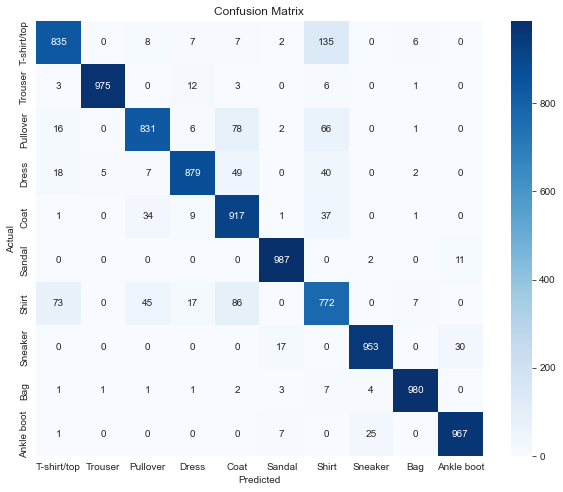

In [38]:
confusion_df = pd.DataFrame(confusion_mtx, index=classes, columns=classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Prediction

In [39]:

predictions = model.predict(X_test)

# Get the predicted class labels for each sample
y_pred = [np.argmax(prediction) for prediction in predictions]

# Calculate accuracy
correct_predictions = np.sum(np.array(y_pred) == np.array(y_test))
accuracy = (correct_predictions / len(y_pred)) * 100

print("Predicted labels:", y_pred)
print("Accuracy:", accuracy, "%")





313/313 [==============================] - 2s 6ms/step
Predicted labels: [9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 2, 5, 7, 5, 1, 4, 6, 6, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7, 6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 2, 4, 7, 8, 7, 0, 2, 6, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 6, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4, 1, 4, 5, 2, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 2, 8, 5, 2, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 6, 9, 2, 2, 8, 6, 4, 2, 2, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 4, 8, 9, 6, 1, 6, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 3, 0, 4, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7,

Accuracy: 90.96 %


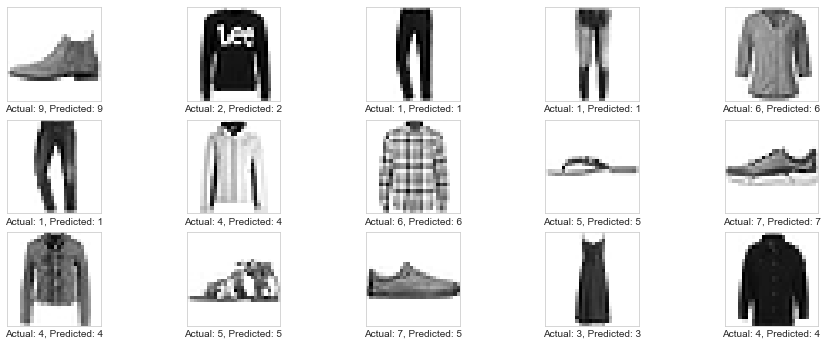

In [49]:

# Define a function to display images and their labels
def plot_images(images, labels, predicted_labels):
    plt.figure(figsize=(15, 10))
    for i in range(15):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(f"Actual: {labels[i]}, Predicted: {predicted_labels[i]}")
        plt.subplots_adjust(wspace=0.5)


plot_images(X_test, y_test, y_pred)
print("Accuracy:", accuracy, "%")


In [41]:

model.save('fashion_mnist_model.h5')


# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___